In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [3]:
# open zipped dataset
with zipfile.ZipFile("Credit EDA Case Study-20210727T203016Z-001.zip") as z:
    #open the csv file in the dataset
    with z.open('Credit EDA Case Study/application_data.csv') as f:
        #read the dataset
        data = pd.read_csv(f)
    with z.open('Credit EDA Case Study/previous_application.csv') as f1:
        p_data = pd.read_csv(f1)

In [4]:
# display application data (data about client has payment difficulties or not)
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Finding null value percentage for each column in application data
round(100*(data.isnull().sum()/len(data)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [6]:
# creating a list of columns where null values are greater than 40% in application data
missing_app_values = data.columns[100*data.isnull().sum()/len(data) > 40]

In [7]:
print(missing_app_values)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [8]:
# dropping these columns because they have a high percentage of missing values
data = data.drop(missing_app_values, axis = 1)
print(data.shape)

(307511, 73)


In [9]:
# dropping unwanted columns that are of no use in this analysis
unwanted_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

data.drop(labels=unwanted_columns, axis=1, inplace=True)

In [10]:
# finding out columns that has missing value so that we can impute them
impute_app_data = list(data.columns[100*(data.isnull().sum()/len(data))>0])

In [11]:
data[impute_app_data].isnull().sum()

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [12]:
# Median of all the numerical columns
median_app_miss = data[impute_app_data].median()
print(median_app_miss)

AMT_ANNUITY                    24903.000000
AMT_GOODS_PRICE               450000.000000
EXT_SOURCE_2                       0.565961
EXT_SOURCE_3                       0.535276
OBS_30_CNT_SOCIAL_CIRCLE           0.000000
DEF_30_CNT_SOCIAL_CIRCLE           0.000000
OBS_60_CNT_SOCIAL_CIRCLE           0.000000
DEF_60_CNT_SOCIAL_CIRCLE           0.000000
AMT_REQ_CREDIT_BUREAU_HOUR         0.000000
AMT_REQ_CREDIT_BUREAU_DAY          0.000000
AMT_REQ_CREDIT_BUREAU_WEEK         0.000000
AMT_REQ_CREDIT_BUREAU_MON          0.000000
AMT_REQ_CREDIT_BUREAU_QRT          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR         1.000000
dtype: float64


- There are two categorical columns that has missing values, first is NAME_TYPE_SUITE which indicates that who was accompanying client when he was applying for the loan and another is OCCUPATION_TYPE which indicates that what kind of occupation does the client have.
- So we can impute this as missing because it may not be provided by the applicant.


In [13]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('missing')
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('missing')
data[impute_app_data].isnull().sum()
# removing categorical variables from the impute_app_data list
impute_app_data.remove('OCCUPATION_TYPE')
impute_app_data.remove('NAME_TYPE_SUITE')
# remaining are the numerical columns
print(impute_app_data)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


- We handled the missing values in categorical columns, now its turn for numerical columns.
- We need to impute the numerical values with median so it will not affect the analysis.

In [14]:
# imputed the missing values
for i,j in zip(impute_app_data, median_app_miss):
    data[i] = data[i].fillna(j)
# again checking for missing values
data[impute_app_data].isnull().sum()

AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [15]:
# checking null values in whole dataset
data.isnull().sum().sum()

0

In [16]:
# checking info on application data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
# printing all the unique values of the categorical column so that we can check whether there are any garbage values or not.
for i in data:
    if data[i].dtype == 'object':     
        print(f'{i} = {data[i].unique()}')

NAME_CONTRACT_TYPE = ['Cash loans' 'Revolving loans']
CODE_GENDER = ['M' 'F' 'XNA']
FLAG_OWN_CAR = ['N' 'Y']
FLAG_OWN_REALTY = ['Y' 'N']
NAME_TYPE_SUITE = ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'missing'
 'Other_B' 'Group of people']
NAME_INCOME_TYPE = ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE = ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS = ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE = ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE = ['Laborers' 'Core staff' 'Accountants' 'Managers' 'missing' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/b

In [18]:
# We can see from above that 'XNA' values are present in gender column which does not make sense
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- These XNA values are null values which we have to fix by imputing them with the greater number of variable.

In [19]:
# take the mode of the gender column to impute
data.loc[data['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = data['CODE_GENDER'].mode()

In [20]:
# Imputed the 'XNA' values
data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [21]:
# 'XNA' values are also present in this column
data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [22]:
data['ORGANIZATION_TYPE'].value_counts(normalize = True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

- In this second highest values are 'XNA' values consist of 18% of column, we need to remove this rows containing these values, it will not impact much if we drop the 'XNA' values.

In [23]:
data = data[~(data['ORGANIZATION_TYPE'] == 'XNA')].reset_index(drop = True)
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252132,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252133,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252134,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
252135,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Now checking numerical columns for any garbage values so we can fix them.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,252137.0,278114.643103,102815.635309,1.000020e+05,189035.000000,278064.000000,367165.000000,4.562550e+05
TARGET,252137.0,0.086600,0.281248,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,252137.0,0.498515,0.763161,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,252137.0,175914.070795,258851.587748,2.565000e+04,112500.000000,157500.000000,211500.000000,1.170000e+08
AMT_CREDIT,252137.0,611398.457583,406527.199875,4.500000e+04,277969.500000,521280.000000,829224.000000,4.050000e+06
AMT_ANNUITY,252137.0,27812.186704,14647.424282,1.980000e+03,17073.000000,25834.500000,35617.500000,2.580255e+05
AMT_GOODS_PRICE,252137.0,549304.739525,373092.424222,4.050000e+04,247500.000000,450000.000000,693000.000000,4.050000e+06
REGION_POPULATION_RELATIVE,252137.0,0.020894,0.013874,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,252137.0,-14769.133174,3662.573769,-2.520000e+04,-17563.000000,-14573.000000,-11775.000000,-7.489000e+03
DAYS_EMPLOYED,252137.0,-2384.169325,2338.360162,-1.791200e+04,-3175.000000,-1648.000000,-767.000000,0.000000e+00


- We can see from above that there are 4 columns which have negative values in them. But these columns does not require negative values they are showing relative no. of days from application.

In [25]:
# Changing the negative to positive values
data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']] = abs(data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']])

In [26]:
data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,252137.000000,252137.000000,252137.000000,252137.000000
mean,14769.133174,2384.169325,4635.430849,2800.639724
std,3662.573769,2338.360162,3252.169156,1515.360629
min,7489.000000,0.000000,0.000000,0.000000
25%,11775.000000,767.000000,1845.000000,1487.000000
50%,14573.000000,1648.000000,4265.000000,2886.000000
75%,17563.000000,3175.000000,6952.000000,4177.000000
max,25200.000000,17912.000000,22928.000000,7197.000000


In [27]:
# Creating a new column with client age in year and then changing them into range so that we can get insights from it.
data['CLIENT_AGE'] = data['DAYS_BIRTH']/365

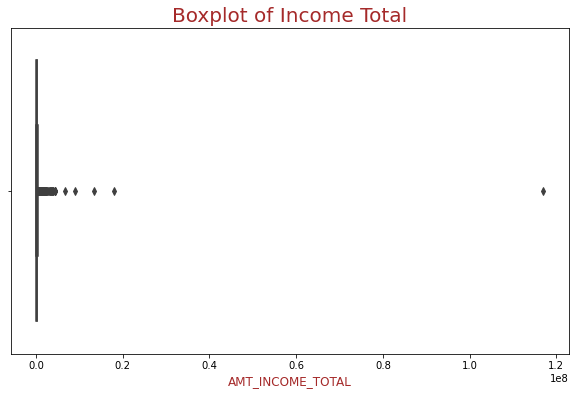

In [28]:
# check for the outliers in income column
plt.figure(figsize = (10,6))
sns.boxplot(data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Income Total', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [29]:
# so we can see from above that there is an outlier messing with our data
data['AMT_INCOME_TOTAL'].describe(percentiles = [0.25,0.5,0.75,0.95,0.99])

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
95%      3.553344e+05
99%      5.175000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
# so the 99% percentile is around 520000 we can remove this value for better analysis
data = data[~(data['AMT_INCOME_TOTAL'] > 520000)]

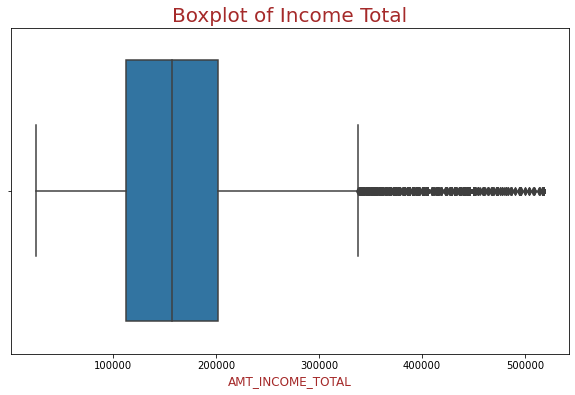

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Income Total', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

## Application Data Analysis


### Univariate Analysis

- We can take a look at Target variable that tells 1 is payment difficulties(means client paid the installments X days late) and 0 tells all the other cases

In [32]:
count_target = round(data['TARGET'].value_counts(normalize = True)*100,2)
count_target

0    91.31
1     8.69
Name: TARGET, dtype: float64

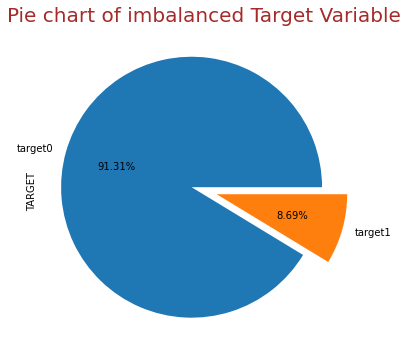

In [33]:
plt.figure(figsize = (6,6))
count_target.plot.pie(autopct = '%.2f%%', explode = [0.1]*2, labels = ['target0', 'target1'])
plt.title('Pie chart of imbalanced Target Variable', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- We can see from above that there is a data imbalance in the dataset. Because there is too much difference between the count of the values.

In [34]:
# Saving these two target variables in different datasets for further analysis
data_0 = data[data['TARGET'] == 0]
data_1 = data[data['TARGET'] == 1]

In [35]:
# ratio of data imbalance of target variables
print('ratio: ',len(data_0)/len(data_1))

ratio:  10.507951873876365


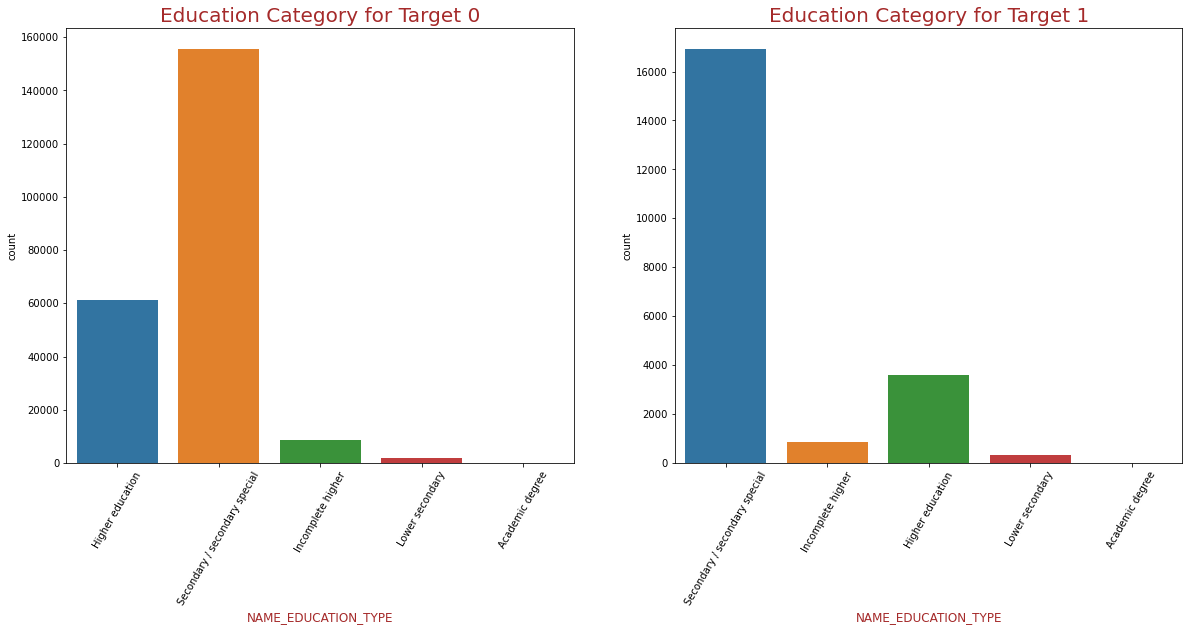

In [36]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data_0['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 60)
plt.title('Education Category for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(1,2,2)
sns.countplot(data_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 60)
plt.title('Education Category for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

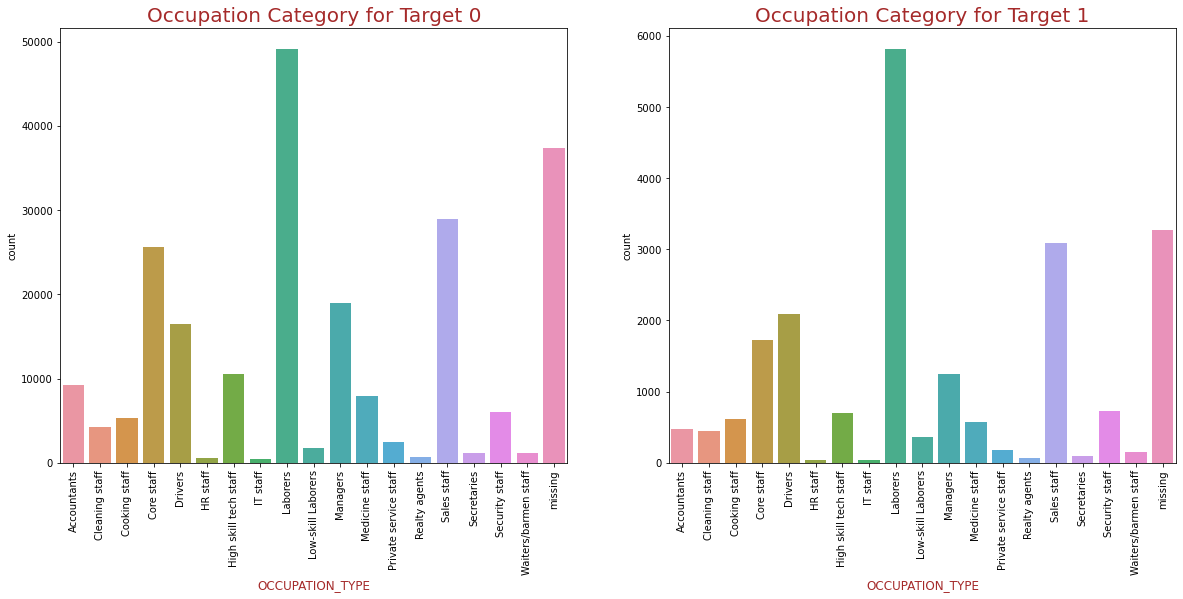

In [37]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data_0['OCCUPATION_TYPE'].sort_values())
plt.xticks(rotation = 90)
plt.title('Occupation Category for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('OCCUPATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(1,2,2)
sns.countplot(data_1['OCCUPATION_TYPE'].sort_values())
plt.xticks(rotation = 90)
plt.title('Occupation Category for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('OCCUPATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

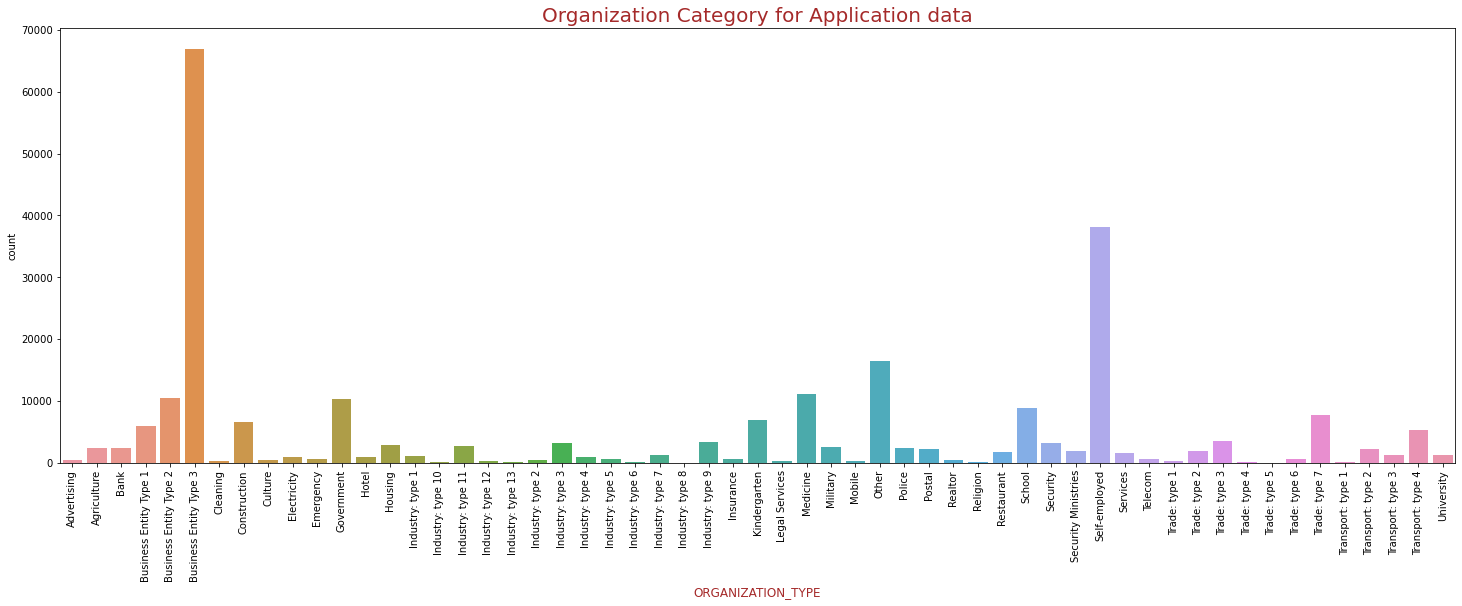

In [38]:
plt.figure(figsize = (25,8))
sns.countplot(data['ORGANIZATION_TYPE'].sort_values())
plt.xticks(rotation = 90)
plt.title('Organization Category for Application data', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('ORGANIZATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

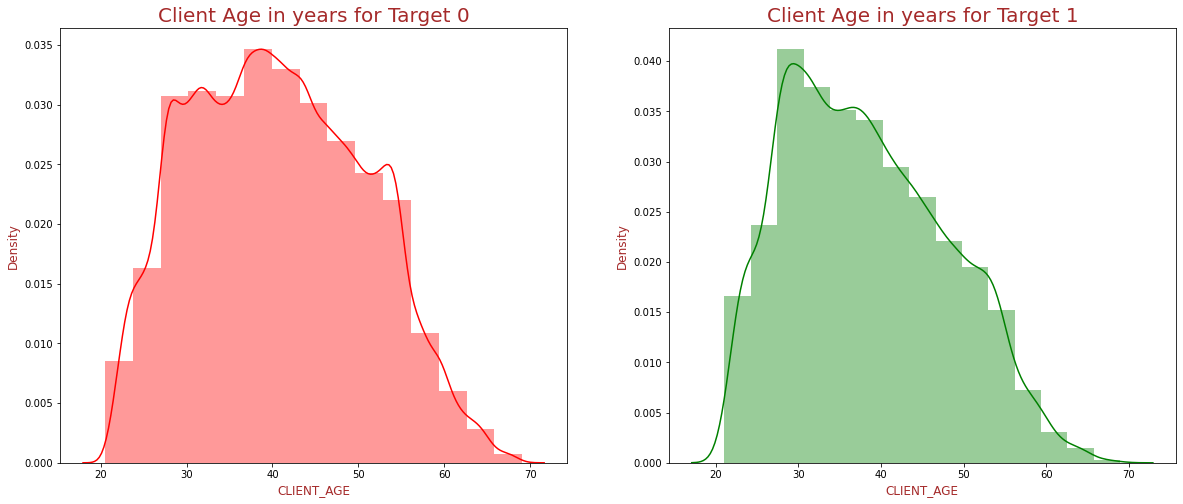

In [39]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(data_0['CLIENT_AGE'], bins = 15, color = 'red')
plt.title('Client Age in years for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('CLIENT_AGE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(1,2,2)
sns.distplot(data_1['CLIENT_AGE'], bins = 15, color = 'green')
plt.title('Client Age in years for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('CLIENT_AGE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

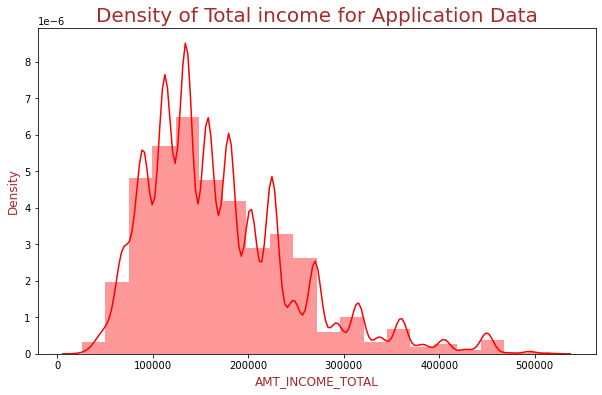

In [40]:
# plotting income column after removing the outlier
plt.figure(figsize = (10,6))
sns.distplot(data['AMT_INCOME_TOTAL'], bins = 20, color = 'red')
plt.title('Density of Total income for Application Data', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

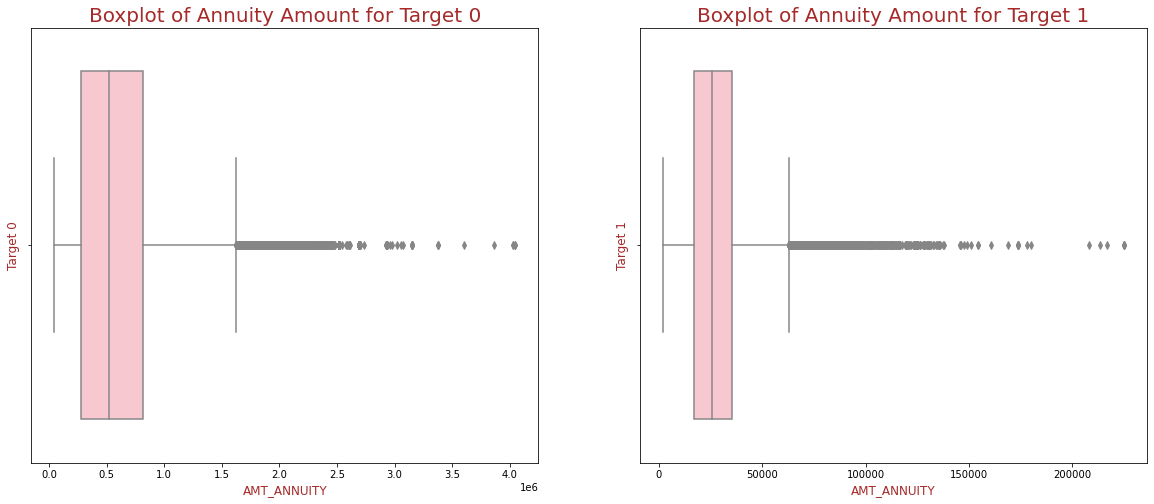

In [41]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(data['AMT_CREDIT'], color = 'pink', orient = 'v')
plt.title('Boxplot of Annuity Amount for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_ANNUITY', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Target 0', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(1,2,2)
sns.boxplot(data['AMT_ANNUITY'], color = 'pink', orient = 'v')
plt.title('Boxplot of Annuity Amount for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_ANNUITY', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Target 1', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- There are outliers present in the above columns but we don't need to do anything because they are correct entries and will help in the analysis.

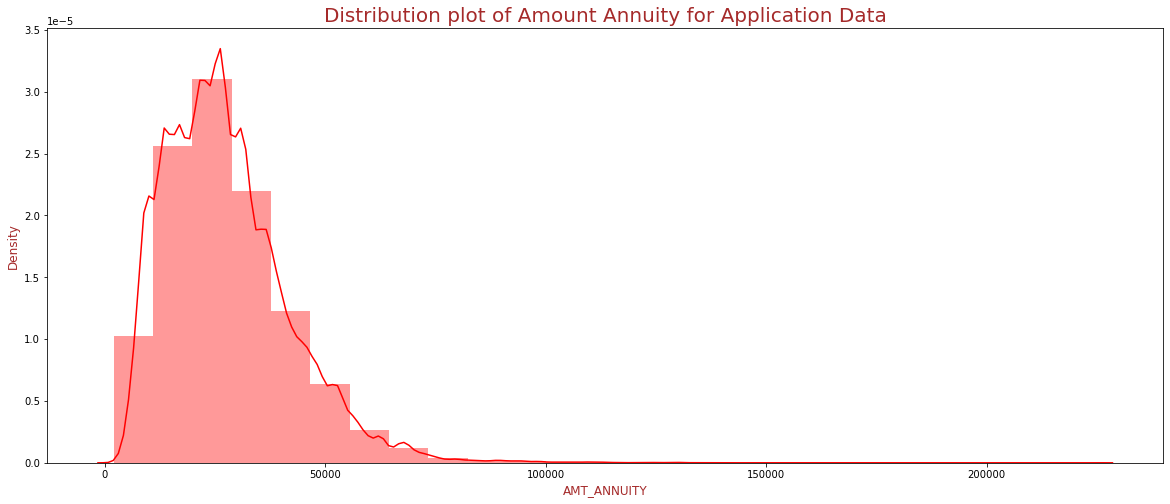

In [42]:
plt.figure(figsize = (20,8))
sns.distplot(data['AMT_ANNUITY'], bins = 25, color = 'red')
plt.title('Distribution plot of Amount Annuity for Application Data', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_ANNUITY', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

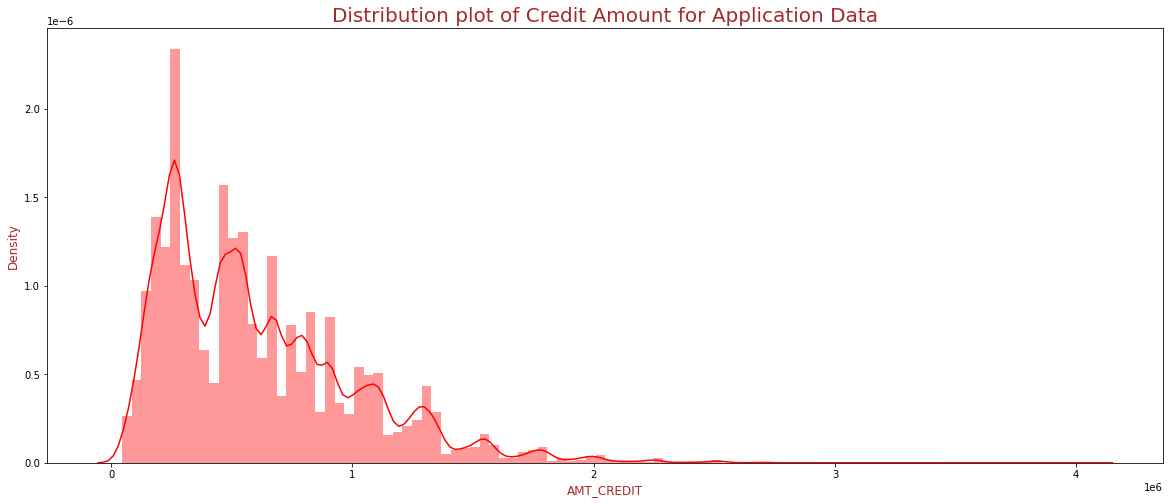

In [43]:
plt.figure(figsize = (20,8))
sns.distplot(data['AMT_CREDIT'], bins = 100, color = 'red')
plt.title('Distribution plot of Credit Amount for Application Data', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_CREDIT', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Bivariate Analysis

- First we need to select top 10 variables to draw a correlation matrix for bivariate and multivariate analysis.<br/>
top10 = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CLIENT_AGE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE']

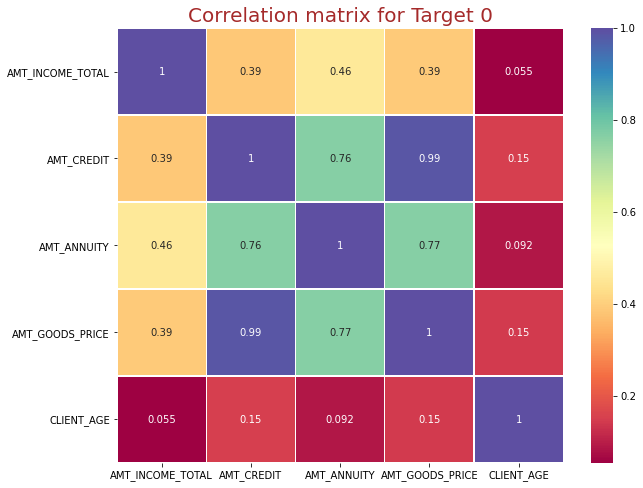

In [44]:
# Lets store this columns in another dataset and then make different correlation of target 0 and target 1 datsets.
top10 = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CLIENT_AGE', 
         'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE']
# creating a correlation matrix for target 0
corr_0 = data_0[top10].corr()
# plotting this matrix in a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_0, xticklabels = corr_0.columns, yticklabels = corr_0.columns, annot = True, cmap = 'Spectral', linewidth = 0.3)
plt.title('Correlation matrix for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

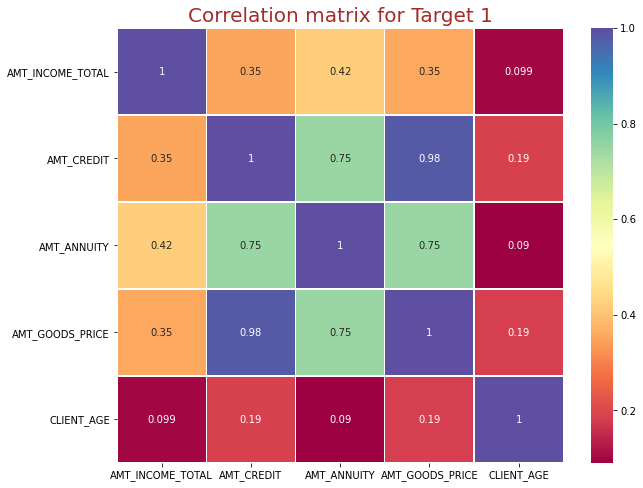

In [45]:
# creating a correlation matrix for target 1
corr_1 = data_1[top10].corr()
# plotting this matrix in a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_1, annot = True, cmap = 'Spectral', linewidth = 0.3)
plt.title('Correlation matrix for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- We can see from the correlations that there are some columns which have higher correlation. The correlations are higher between these columns 'AMT_GOODS_PRICE' & 'AMT_CREDIT', 'AMT_ANNUITY' & 'AMT_CREDIT', 'AMT_ANNUITY' & 'AMT_GOODS_PRICE',  

<Figure size 1440x1440 with 0 Axes>

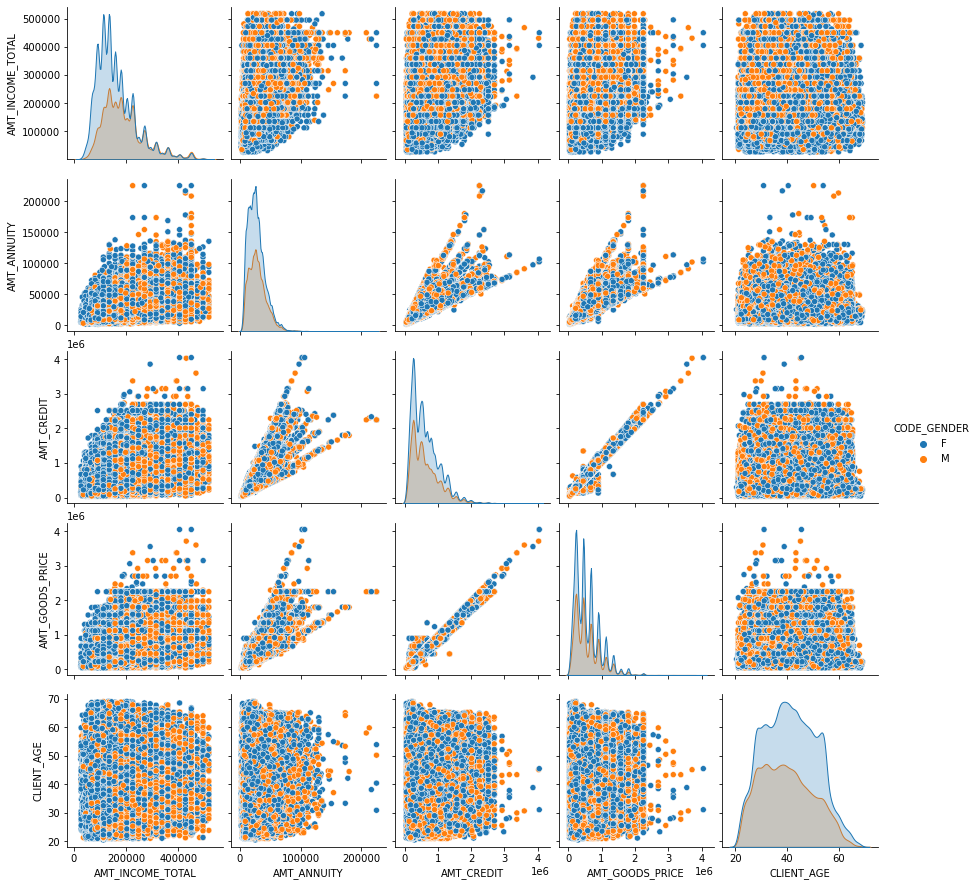

In [46]:
# Pairplot for numerical column with gender for Target 0
plt.figure(figsize = (20,20))
sns.pairplot(data = data_0, vars = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','CLIENT_AGE'], hue = 'CODE_GENDER')
plt.show()

<Figure size 1440x1440 with 0 Axes>

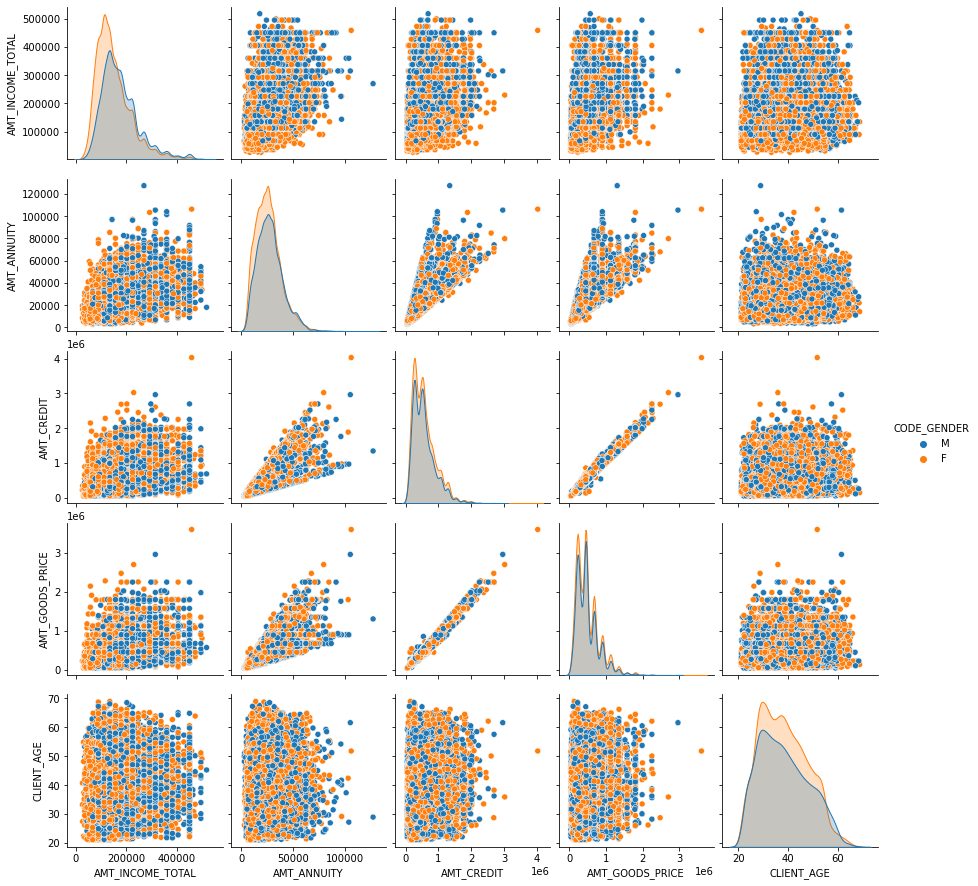

In [47]:
# Pairplot for numerical column with gender for Target 1
plt.figure(figsize = (20,20))
sns.pairplot(data = data_1, vars = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','CLIENT_AGE'], hue = 'CODE_GENDER')
plt.show()

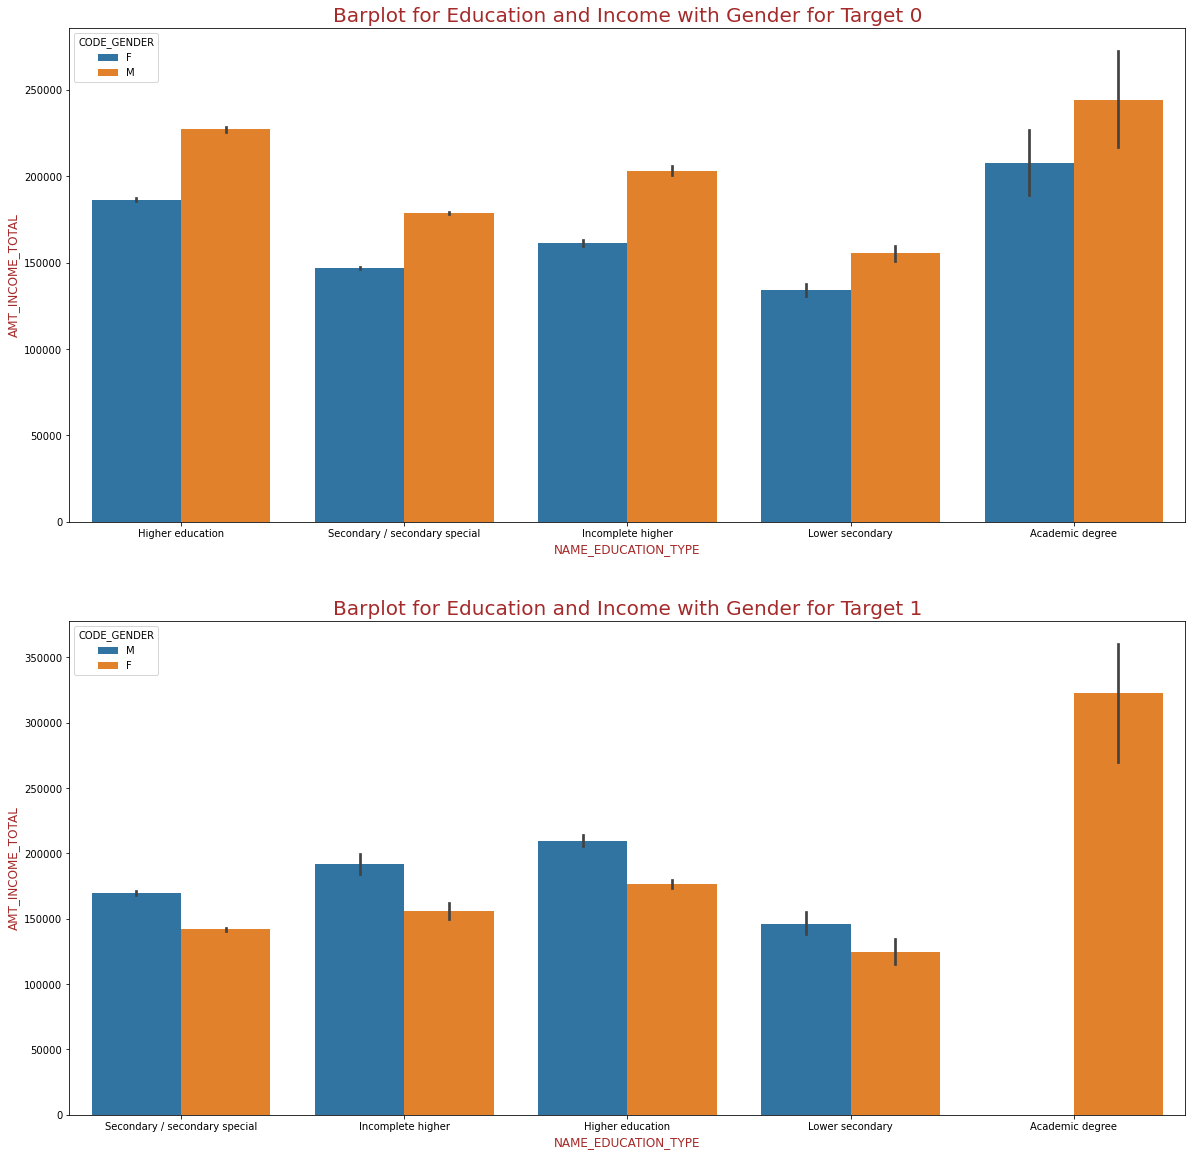

In [48]:
plt.figure(figsize = (20,20))
plt.subplot(2,1,1)
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', data = data_0, hue = 'CODE_GENDER' )
plt.title('Barplot for Education and Income with Gender for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(2,1,2)
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', data = data_1, hue = 'CODE_GENDER')
plt.title('Barplot for Education and Income with Gender for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

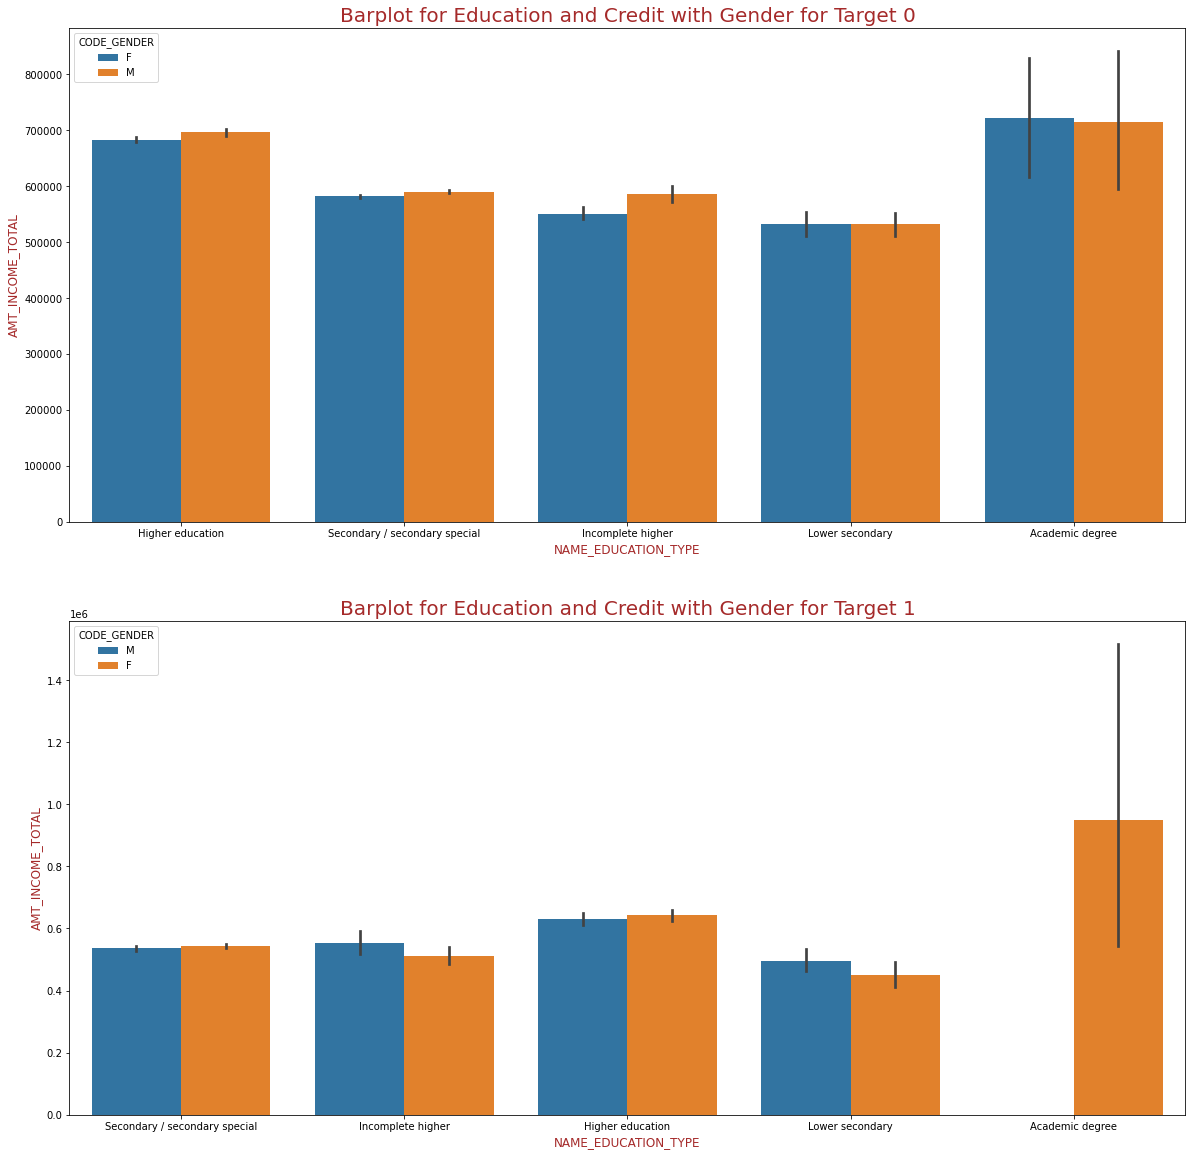

In [49]:
plt.figure(figsize = (20,20))
plt.subplot(2,1,1)
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = data_0, hue = 'CODE_GENDER' )
plt.title('Barplot for Education and Credit with Gender for Target 0', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(2,1,2)
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = data_1, hue = 'CODE_GENDER')
plt.title('Barplot for Education and Credit with Gender for Target 1', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- Now we add the previous application data for further analysis.

In [50]:
# Show first 5 columns of previous application data
p_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Finding null value percentage for each column in previous loan data
round(100*(p_data.isnull().sum()/len(p_data)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [52]:
# creating a list of columns where null values are greater than 30% in previous loan data
missing_pdata_values = p_data.columns[100*p_data.isnull().sum()/len(p_data) > 30]

In [53]:
print(missing_pdata_values)

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [54]:
# dropping these columns because they have a high percentage of missing values
p_data = p_data.drop(missing_pdata_values, axis = 1)
print(p_data.shape)

(1670214, 26)


In [55]:
# columns to impute the missing values
impute_p_data = list(p_data.columns[100*(p_data.isnull().sum()/len(p_data)) > 0])

In [56]:
# checking the null values in p_data dataframe
p_data[impute_p_data].isnull().sum()

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64

In [57]:
# Describing the numerical columns of the columns to be imputed
p_data[impute_p_data].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,1297979.0,15955.120659,14782.137335,0.0,6321.78,11250.0,20658.42,418058.145
AMT_CREDIT,1670213.0,196114.021218,318574.616546,0.0,24160.50,80541.0,216418.50,6905160.000
AMT_GOODS_PRICE,1284699.0,227847.279283,315396.557937,0.0,50841.00,112320.0,234000.00,6905160.000
CNT_PAYMENT,1297984.0,16.054082,14.567288,0.0,6.00,12.0,24.00,84.000


In [58]:
p_data['PRODUCT_COMBINATION'].mode()

0    Cash
dtype: object

In [59]:
# imputing the categorical column with mode value because there are small amount of values to impute.
p_data['PRODUCT_COMBINATION'] = p_data['PRODUCT_COMBINATION'].fillna('Cash')
# removing categorical column from the list
impute_p_data.remove('PRODUCT_COMBINATION')
impute_p_data

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

In [60]:
p_data.isnull().sum().sum()

1129981

In [61]:
# imputing the numerical columns with median values
for i, j in zip(impute_p_data, p_data[impute_p_data].median()):
    p_data[i] = p_data[i].fillna(j)
# again checking for missing values
p_data[impute_p_data].isnull().sum()

AMT_ANNUITY        0
AMT_CREDIT         0
AMT_GOODS_PRICE    0
CNT_PAYMENT        0
dtype: int64

In [62]:
p_data.isnull().sum().sum()

0

In [63]:
# printing all the unique values of the categorical column so that we can check whether there are any garbage values or not.
for i in p_data:
    if p_data[i].dtype == 'object':     
        print(f'{i} = {p_data[i].unique()}')

NAME_CONTRACT_TYPE = ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
WEEKDAY_APPR_PROCESS_START = ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT = ['Y' 'N']
NAME_CASH_LOAN_PURPOSE = ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS = ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE = ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON = ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']

In [64]:
filter_xna = []
filter_xap = []
for i in p_data.columns:
    if 'XNA' in p_data[i].unique():
        filter_xna.append(i)
    if 'XAP' in p_data[i].unique():
        filter_xap.append(i)
print(filter_xna)
print(filter_xap)

['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP']
['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON']


In [65]:
for i in filter_xna:
    pct_xna = 100*p_data.loc[p_data[i] == 'XNA', i].value_counts()/len(p_data)
    print(pct_xna)

XNA    0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64
XNA    40.588691
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64
XNA    37.563091
Name: NAME_PAYMENT_TYPE, dtype: float64
XNA    0.313972
Name: CODE_REJECT_REASON, dtype: float64
XNA    0.116213
Name: NAME_CLIENT_TYPE, dtype: float64
XNA    56.927376
Name: NAME_GOODS_CATEGORY, dtype: float64
XNA    22.286366
Name: NAME_PORTFOLIO, dtype: float64
XNA    63.684414
Name: NAME_PRODUCT_TYPE, dtype: float64
XNA    51.234153
Name: NAME_SELLER_INDUSTRY, dtype: float64
XNA    30.96699
Name: NAME_YIELD_GROUP, dtype: float64


- Drop the columns above which has more than 20% of XNA values

In [66]:
p_data.drop(['NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'], axis = 1, inplace = True)

In [67]:
filter_xna = []
filter_xap = []
for i in p_data.columns:
    if 'XNA' in p_data[i].unique():
        filter_xna.append(i)
    if 'XAP' in p_data[i].unique():
        filter_xap.append(i)
print(filter_xna)
print(filter_xap)

['NAME_CONTRACT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE']
['CODE_REJECT_REASON']


In [68]:
for i in filter_xap:
    pct_xap = p_data.loc[p_data[i] == 'XAP', i].value_counts()
    print(pct_xap)

XAP    1353093
Name: CODE_REJECT_REASON, dtype: int64


In [69]:
for i in filter_xna:
    p_data = p_data[~(p_data[i] == 'XNA')].reset_index(drop = True)

In [70]:
p_data = p_data[~(p_data['CODE_REJECT_REASON'] == 'XAP')].reset_index(drop = True)

In [71]:
p_data.shape

(311466, 19)

In [72]:
for i in p_data:
    if p_data[i].dtype == 'object':     
        print(f'{i} = {p_data[i].unique()}')

NAME_CONTRACT_TYPE = ['Cash loans' 'Consumer loans' 'Revolving loans']
WEEKDAY_APPR_PROCESS_START = ['THURSDAY' 'SATURDAY' 'MONDAY' 'TUESDAY' 'WEDNESDAY' 'FRIDAY' 'SUNDAY']
FLAG_LAST_APPL_PER_CONTRACT = ['Y' 'N']
NAME_CONTRACT_STATUS = ['Refused' 'Unused offer']
CODE_REJECT_REASON = ['HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'VERIF' 'SYSTEM']
NAME_CLIENT_TYPE = ['Repeater' 'Refreshed' 'New']
CHANNEL_TYPE = ['Credit and cash offices' 'AP+ (Cash loan)' 'Country-wide'
 'Regional / Local' 'Stone' 'Channel of corporate sales' 'Contact center'
 'Car dealer']
PRODUCT_COMBINATION = ['Cash Street: high' 'Cash X-Sell: low' 'Cash'
 'POS household with interest' 'POS mobile with interest' 'Card X-Sell'
 'Cash X-Sell: high' 'POS household without interest' 'Cash Street: low'
 'Cash X-Sell: middle' 'Card Street' 'POS industry with interest'
 'Cash Street: middle' 'POS other with interest'
 'POS mobile without interest' 'POS industry without interest'
 'POS others without interest']


In [73]:
p_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,311466.0,1.952880e+06,527015.083326,1009238.0,1511502.25,1964989.0,2405391.750,2845382.000
SK_ID_CURR,311466.0,2.786174e+05,102827.360764,100006.0,189510.00,279317.0,367948.500,456255.000
AMT_ANNUITY,311466.0,1.857370e+04,15733.601225,0.0,10215.63,11250.0,23772.105,418058.145
AMT_APPLICATION,311466.0,3.107892e+05,420072.973039,0.0,45000.00,135000.0,445500.000,6905160.000
AMT_CREDIT,311466.0,3.470748e+05,456779.808397,0.0,52267.50,158179.5,450000.000,6905160.000
AMT_GOODS_PRICE,311466.0,3.238503e+05,411981.686851,0.0,85455.00,135000.0,449167.500,6905160.000
HOUR_APPR_PROCESS_START,311466.0,1.249220e+01,3.359117,0.0,10.00,12.0,15.000,23.000
NFLAG_LAST_APPL_IN_DAY,311466.0,9.863549e-01,0.116013,0.0,1.00,1.0,1.000,1.000
DAYS_DECISION,311466.0,-7.957060e+02,737.711290,-2922.0,-1119.00,-491.0,-260.000,-2.000
SELLERPLACE_AREA,311466.0,2.192920e+02,1340.868025,-1.0,-1.00,-1.0,42.000,74625.000


In [74]:
p_data.drop(['HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'SK_ID_PREV'], axis = 1, inplace = True)

- Now the dataset is clean we can merge Application Data and Previous Application data for further analysis.

In [75]:
merge_data = data.merge(p_data, on = 'SK_ID_CURR', how = 'inner')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CHANNEL_TYPE,PRODUCT_COMBINATION
0,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,688500.0,906615.0,688500.0,THURSDAY,Y,Refused,LIMIT,Repeater,Credit and cash offices,Cash X-Sell: low
1,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,33660.0,33660.0,33660.0,SATURDAY,Y,Refused,SCO,Repeater,Stone,POS industry with interest
2,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,33660.0,33660.0,33660.0,FRIDAY,Y,Refused,SCO,Repeater,Stone,POS industry with interest
3,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,33660.0,33660.0,33660.0,FRIDAY,Y,Refused,SCO,Repeater,Stone,POS industry with interest
4,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,33250.5,33250.5,33250.5,WEDNESDAY,Y,Refused,LIMIT,Refreshed,Country-wide,POS mobile with interest


### Univariate Analysis

In [76]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216327 entries, 0 to 216326
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    216327 non-null  int64  
 1   TARGET                        216327 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          216327 non-null  object 
 3   CODE_GENDER                   216303 non-null  object 
 4   FLAG_OWN_CAR                  216327 non-null  object 
 5   FLAG_OWN_REALTY               216327 non-null  object 
 6   CNT_CHILDREN                  216327 non-null  int64  
 7   AMT_INCOME_TOTAL              216327 non-null  float64
 8   AMT_CREDIT_x                  216327 non-null  float64
 9   AMT_ANNUITY_x                 216327 non-null  float64
 10  AMT_GOODS_PRICE_x             216327 non-null  float64
 11  NAME_TYPE_SUITE               216327 non-null  object 
 12  NAME_INCOME_TYPE              216327 non-nul

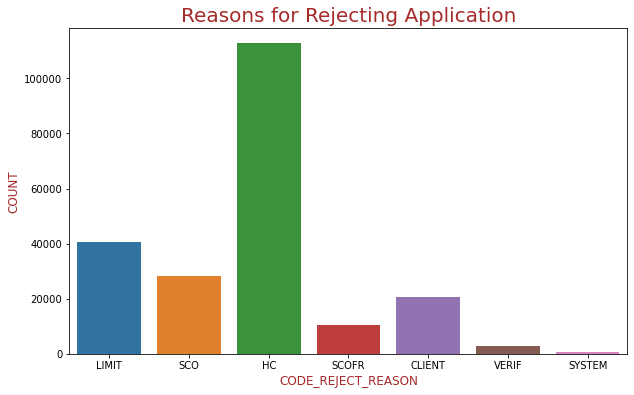

In [77]:
plt.figure(figsize = (10,6))
sns.countplot(merge_data['CODE_REJECT_REASON'])
plt.title('Reasons for Rejecting Application', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('CODE_REJECT_REASON', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('COUNT', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

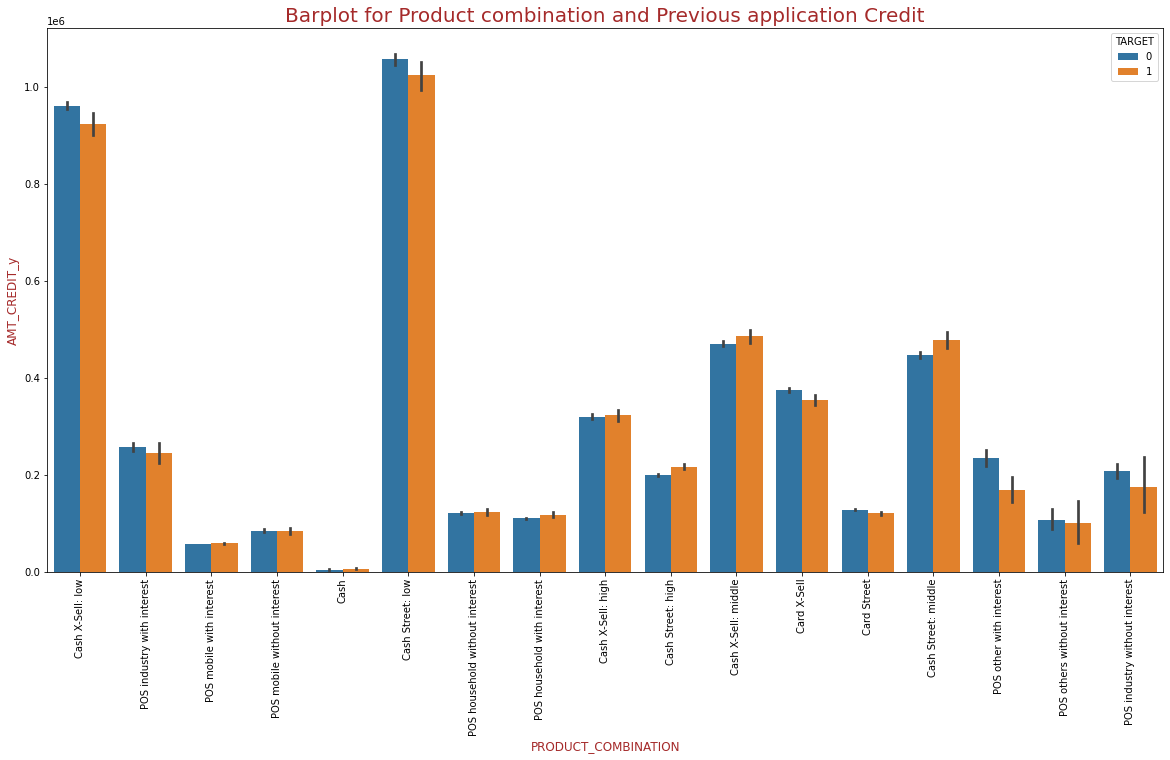

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x='PRODUCT_COMBINATION', y='AMT_CREDIT_y', data= merge_data, hue = 'TARGET')
plt.xticks(rotation=90)
plt.title('Barplot for Product combination and Previous application Credit', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('PRODUCT_COMBINATION', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_CREDIT_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

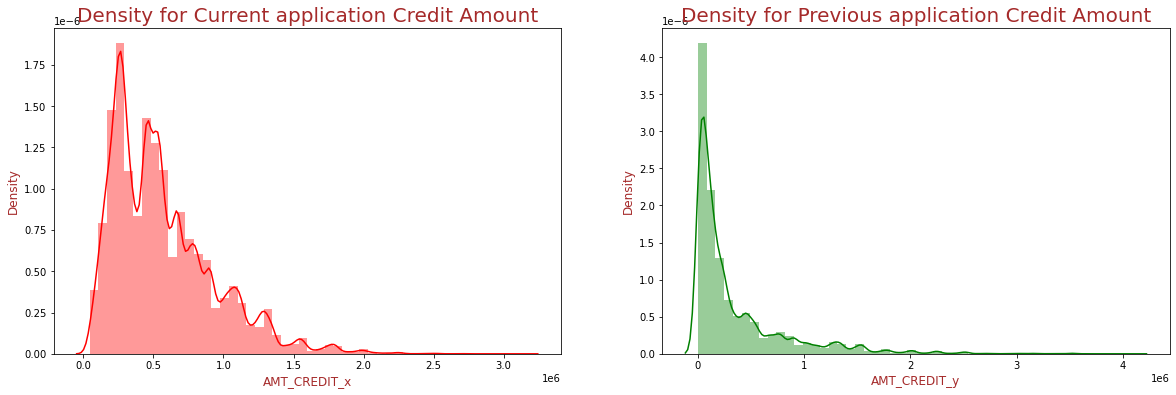

In [79]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.distplot(merge_data['AMT_CREDIT_x'], color = 'red')
plt.title('Density for Current application Credit Amount', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_CREDIT_x', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(1,2,2)
sns.distplot(merge_data['AMT_CREDIT_y'], color = 'green')
plt.title('Density for Previous application Credit Amount', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('AMT_CREDIT_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

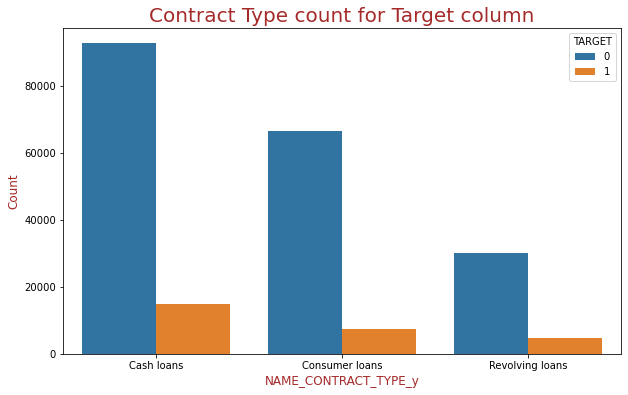

In [80]:
plt.figure(figsize = (10,6))
sns.countplot(merge_data['NAME_CONTRACT_TYPE_y'], hue = merge_data['TARGET'])
plt.title('Contract Type count for Target column', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_CONTRACT_TYPE_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

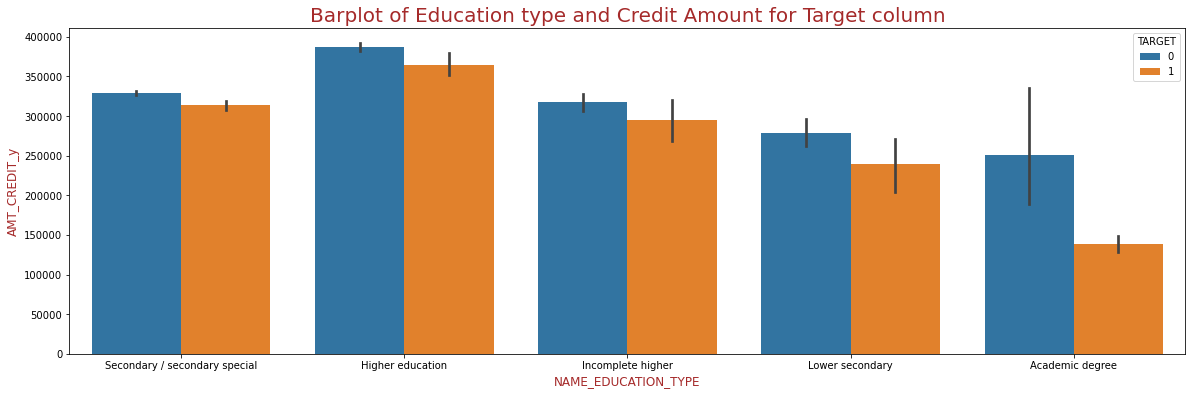

In [81]:
plt.figure(figsize = (20,6))
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT_y', data = merge_data, hue = 'TARGET')
plt.title('Barplot of Education type and Credit Amount for Target column', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_CREDIT_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('NAME_EDUCATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

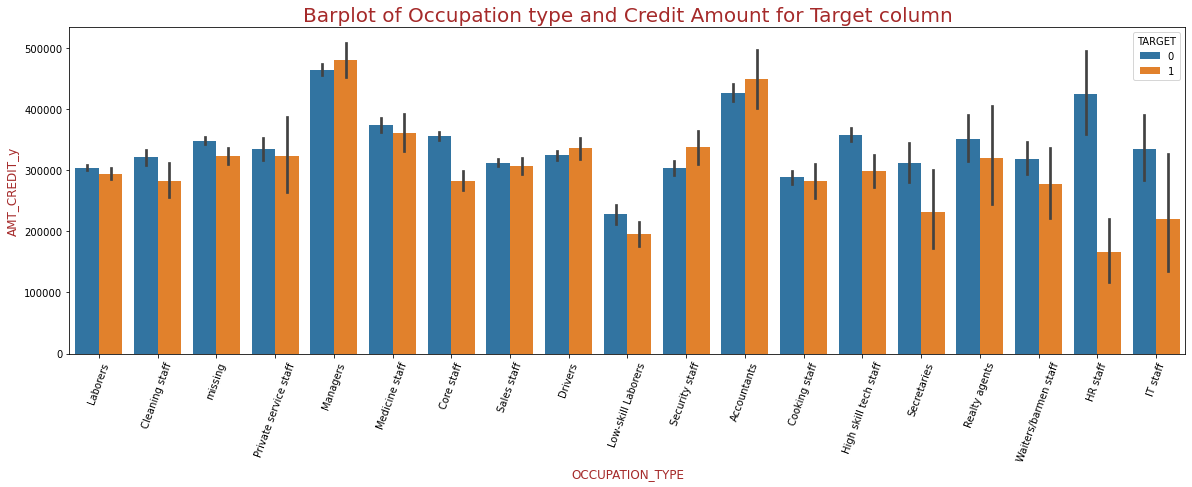

In [82]:
plt.figure(figsize = (20,6))
sns.barplot(x = 'OCCUPATION_TYPE', y = 'AMT_CREDIT_y', data = merge_data, hue = 'TARGET')
plt.xticks(rotation = 70)
plt.title('Barplot of Occupation type and Credit Amount for Target column', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_CREDIT_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('OCCUPATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

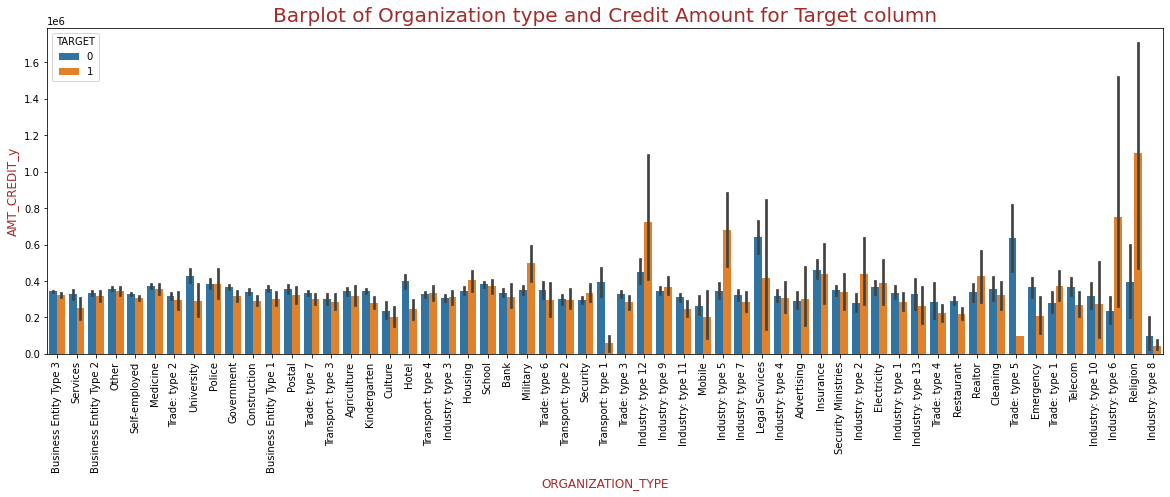

In [83]:
plt.figure(figsize = (20,6))
sns.barplot(x = 'ORGANIZATION_TYPE', y = 'AMT_CREDIT_y', data = merge_data, hue = 'TARGET')
plt.xticks(rotation = 90)
plt.title('Barplot of Organization type and Credit Amount for Target column', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('AMT_CREDIT_y', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('ORGANIZATION_TYPE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()